In [1]:
import pandas as pd
import csv
import os
from array import array

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib.colors import LogNorm

from ipywidgets import *
import numpy, scipy, scipy.optimize
import matplotlib
# from mpl_toolkits.mplot3d import  Axes3D                                                                                                                                          \
                                                                                                                                                                                     
from matplotlib import cm # to colormap 3D surfaces from blue to red                                                                                                                
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

In [2]:
from matplotlib import pyplot as plt1

In [3]:
df_hzd_theory = pd.read_csv("https://raw.githubusercontent.com/aminnj/scouting/master/theory/hzd/hzd.csv")
df_hzd_theory = df_hzd_theory[df_hzd_theory["mass"] % 100 == 0]
df_hzd_theory["mass"] /= 1e3
df_hzd_theory = df_hzd_theory.set_index("mass")
# ctau is now in mm
df_hzd_theory[df_hzd_theory.columns[df_hzd_theory.columns.str.contains("ctau_")]] *= 1e3

#print df_hzd_theory

def get_eps(mass, ctau):
    """
    Mass in GeV, ctau in mm.
    Returns epsilon.
    """
    row = df_hzd_theory.iloc[np.abs(df_hzd_theory.index - mass).argmin()]
    k = row["ctau_for_eps10em2"]
    eps = 1e-2*(k/ctau)**0.5
    return eps


def get_br(mass):
    row = df_hzd_theory.iloc[np.abs(df_hzd_theory.index - mass).argmin()]
    k = row["br_zdtosm"]
    br = k
    return br

In [4]:
get_eps(0.3, 133.723117) # should be 1-e6, yep
get_br(0.3) # should be 0.469274, yep

0.4692744825316794

In [14]:
df_limits = pd.read_csv("~/nobackup/Jupyter/hzd_BRbrUL_v3_smoothed.csv")
print df_limits['mass'].tolist()
df_limits = df_limits.set_index("mass")
def get_lim(mass, ctau):
    """
    Mass in GeV, ctau in mm.
    Returns limit.
    """
    
#     limits.iloc[32]
#     row = df_limits.iloc[np.abs(mass).argmin() - 1]
#     print row
    row = df_limits.iloc[np.abs(df_limits.index - mass).argmin()]
    #print np.abs(df_limits.index - mass).argmin()
   
    limit = row["ctau = " + str(ctau)]
    return limit

get_lim(15, 0.2)#0.00010171282779148337 for cheb
get_lim(1.25,10)

[0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.0, 2.02, 2.04, 2.06, 2.08, 2.1, 2.14, 2.16, 2.18, 2.2, 2.22, 2.24, 2.26, 2.28, 2.3, 2.32, 2.34, 2.36, 2.38, 2.4, 2.42, 2.44, 2.46, 2.48, 2.5, 2.52, 2.54, 2.56, 2.58, 2.6, 2.62, 2.64, 2.66, 2.68, 2.7, 2.72, 2.74, 2.76, 2.8, 4.16, 4.2, 4.24, 4.28, 4.32, 4.36, 4.4, 4.44, 4.48, 4.52, 4.56, 4.6, 4.64, 4.68, 4.72, 4.76, 4.8, 4.84, 

0.0005692834566616593

In [15]:
print df_limits.iloc[:]

        ctau = 0.1  ctau = 0.2  ctau = 0.3  ctau = 0.4  ctau = 0.5  \
mass                                                                 
0.610     0.050860    0.008851    0.004197    0.003053    0.002461   
0.615     0.045802    0.008175    0.000000    0.000000    0.000000   
0.620     0.000000    0.007598    0.003521    0.002427    0.001925   
0.625     0.032383    0.000000    0.003222    0.002352    0.001925   
0.630     0.029992    0.006683    0.003471    0.002536    0.002089   
0.635     0.026016    0.000000    0.000000    0.002417    0.000000   
0.640     0.031102    0.006345    0.003262    0.002352    0.001944   
0.645     0.000000    0.006146    0.003172    0.002287    0.001894   
0.650     0.025919    0.005668    0.003003    0.002173    0.001815   
0.655     0.024826    0.005440    0.002899    0.002099    0.001751   
0.660     0.023824    0.005261    0.002820    0.002034    0.001706   
0.665     0.023045    0.005161    0.002779    0.002004    0.001683   
0.670     0.024159  

[0.07312084511428553, 0.06568655320721145, 0.058048581915088014, 0.06191848737136084, 0.05387315756508116, 0.05468787448473605, 0.05224372363539013, 0.050614289737553664, 0.049086695453838564, 0.04745726155926276, 0.0462351861298964, 0.04450391262230352, 0.042874478733525886, 0.04246712025029342, 0.014420489701137353, 0.01457324912693726, 0.014267730276777675, 0.014023315197945856, 0.013646508616866443, 0.013371541652410666, 0.005316027984819482, 0.004949405365222532, 0.005234556291638929, 0.0051734525216941855, 0.005000325173734998, 0.005122532713613885, 0.0051836364835909105, 0.005448419486731877, 0.004470759167666915, 0.004552230860975297, 0.004674438400916861, 0.004297631819503729, 0.004277263896188175, 0.004226344087938097, 0.00437910351268249, 0.0044503912442245075, 0.0044503912442245075, 0.004012480892946068, 0.003768065813143319, 0.0037171460048616048, 0.003513466771753572, 0.003228315845303881, 0.003452363001799537, 0.003207947922022035, 0.003381075270203256, 0.003340339423598

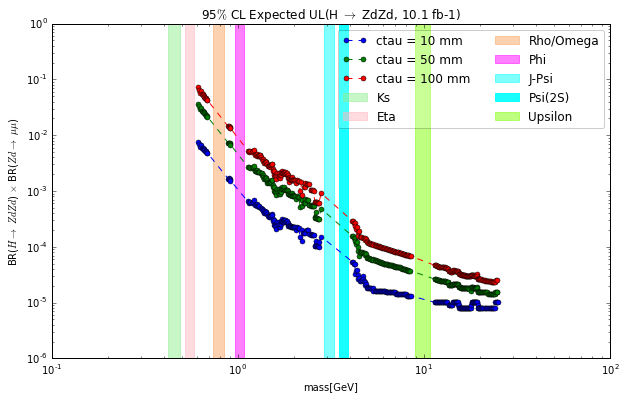

In [20]:
#masses = [0.5,0.525,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.8,0.825,0.85,0.875,0.9,0.925,0.95,1.25,1.5,1.75,2,2.25,2.5,2.75,3.5,4,4.25,4.5,4.75,5,5.5,6,6.5,7,7.5,8,8.5,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
#masses = [0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.0, 2.02, 2.04, 2.06, 2.08, 2.1, 2.14, 2.16, 2.18, 2.2, 2.22, 2.26, 2.28, 2.3, 2.32, 2.34, 2.36, 2.38, 2.4, 2.42, 2.44, 2.46, 2.48, 2.5, 2.52, 2.54, 2.56, 2.58, 2.6, 2.62, 2.64, 2.66, 2.68, 2.7, 2.72, 4.12, 4.16, 4.2, 4.24, 4.28, 4.36, 4.4, 4.44, 4.48, 4.52, 4.56, 4.6, 4.64, 4.68, 4.72, 4.76, 4.8, 4.84, 4.88, 4.92, 4.96, 5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.06, 6.12, 6.18, 6.24, 6.3, 6.36, 6.42, 6.48, 6.54, 6.6, 6.66, 6.72, 6.78, 6.84, 6.9, 6.96, 7.0, 7.07, 7.14, 7.21, 7.28, 7.35, 7.42, 7.49, 7.56, 7.63, 7.7, 7.77, 7.84, 7.91, 7.98, 8.0, 8.08, 8.16, 8.24, 8.32, 8.4, 8.48, 8.56, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.2, 20.4, 20.6, 20.8, 21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22.2, 22.4, 22.6, 22.8, 23.0, 23.2, 23.4, 23.6, 23.8, 24.0, 24.2, 24.4, 24.6, 24.8, 25.0]
#masses = [0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2, 2.02, 2.04, 2.06, 2.08, 2.1, 2, 12, 2.14, 2.16, 2.18, 2.2, 2.22, 2.24, 2.26, 2.28, 2.3, 2.32, 2.34, 2.36, 2.38, 2.4, 2.42, 2.44, 2.46, 2.48, 2.5, 2.52, 2.54, 2.56, 2.58, 2.6, 2.62, 2.64, 2.66, 2.68, 2.7, 2.72, 2.74, 2.76, 2.78, 2.8, 4.12, 4.16, 4.2, 4.24, 4.28, 4.32, 4.36, 4.4, 4.44, 4.48, 4.52, 4.56, 4.6, 4.64, 4.68, 4.72, 4.76, 4.8, 4.84, 4.88, 4.92, 4.96, 5, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6, 6.06, 6.12, 6.18, 6.24, 6.3, 6.36, 6.42, 6.48, 6.54, 6.6, 6.66, 6.72, 6.78, 6.84, 6.9, 6.96, 7, 7.07, 7.14, 7.21, 7.28, 7.35, 7.42, 7.49, 7.56, 7.63, 7.7, 7.77, 7.84, 7.91, 7.98, 8, 8.08, 8.16, 8.24, 8.32, 8.4, 8.48, 8.56, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20, 20.2, 20.4, 20.6, 20.8, 21, 21.2, 21.4, 21.6, 21.8, 22, 22.2, 22.4, 22.6, 22.8, 23, 23.2, 23.4, 23.6, 23.8, 24, 24.2, 24.4, 24.6, 24.8, 25]
masses = [0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2, 2.02, 2.04, 2.06, 2.08, 2.1, 2.12, 2.14, 2.16, 2.18, 2.2, 2.22, 2.24, 2.26, 2.28, 2.3, 2.32, 2.34, 2.36, 2.38, 2.4, 2.42, 2.44, 2.46, 2.48, 2.5, 2.52, 2.54, 2.56, 2.58, 2.6, 2.62, 2.64, 2.66, 2.68, 2.7, 2.72, 2.74, 2.76, 2.78, 2.8, 4.12, 4.16, 4.2, 4.24, 4.28, 4.32, 4.36, 4.4, 4.44, 4.48, 4.52, 4.56, 4.6, 4.64, 4.68, 4.72, 4.76, 4.8, 4.84, 4.88, 4.92, 4.96, 5, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6, 6.06, 6.12, 6.18, 6.24, 6.3, 6.36, 6.42, 6.48, 6.54, 6.6, 6.66, 6.72, 6.78, 6.84, 6.9, 6.96, 7, 7.07, 7.14, 7.21, 7.28, 7.35, 7.42, 7.49, 7.56, 7.63, 7.7, 7.77, 7.84, 7.91, 7.98, 8, 8.08, 8.16, 8.24, 8.32, 8.4, 8.48, 8.56, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20, 20.2, 20.4, 20.6, 20.8, 21, 21.2, 21.4, 21.6, 21.8, 22, 22.2, 22.4, 22.6, 22.8, 23, 23.2, 23.4, 23.6, 23.8, 24, 24.2, 24.4, 24.6, 24.8, 25]


#1.31,1.45,2.24,2.74,2.76,2.78,2.8,18.6

limits_ctau1 = []
limits_ctau5 = []
limits_ctau10 = []
limits_ctau50 = []
limits_ctau100 = []

masses1 = []
masses5 = []
masses10 = []
masses50 = []
masses100 = []

for k in range(len(masses)):
    if get_lim(masses[k],1) != 0:
        limits_ctau1.append(get_lim(masses[k],1))
        masses1.append(masses[k])
    if get_lim(masses[k],5) != 0:
        limits_ctau5.append(get_lim(masses[k],5))
        masses5.append(masses[k])
    if get_lim(masses[k],10) != 0:
        limits_ctau10.append(get_lim(masses[k],10))
        masses10.append(masses[k])
    if get_lim(masses[k],50) != 0:
        limits_ctau50.append(get_lim(masses[k],50))
        masses50.append(masses[k])
    if get_lim(masses[k],100) != 0:
        limits_ctau100.append(get_lim(masses[k],100))
        masses100.append(masses[k])

# print limits_ctau1
# print limits_ctau10
print limits_ctau100

from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 10})

#plt.plot(masses,limits_ctau1,linestyle='--', marker='o', label= 'ctau = 1 mm',markersize=5)
#plt.plot(masses,limits_ctau5,linestyle='--', marker='o', label= 'ctau = 5 mm',markersize=5)
plt.plot(masses10,limits_ctau10,linestyle='--', marker='o', label= 'ctau = 10 mm',markersize=5)
plt.plot(masses50,limits_ctau50,linestyle='--', marker='o', label= 'ctau = 50 mm',markersize=5)
plt.plot(masses100,limits_ctau100,linestyle='--', marker='o', label= 'ctau = 100 mm',markersize=5)
                                                         
    
plt.axvspan(0.42, 0.49, alpha=0.5, color='lightgreen', label = "Ks")
plt.axvspan(0.52, 0.58, alpha=0.5, color='lightpink', label = "Eta")
plt.axvspan(0.73, 0.84, alpha=0.5, color='sandybrown', label = "Rho/Omega")
plt.axvspan(0.96, 1.08, alpha=0.5, color='magenta', label = "Phi")
plt.axvspan(2.91, 3.27, alpha=0.5, color='cyan', label = "J-Psi")
plt.axvspan(3.47, 3.89, alpha=0.9, color='cyan', label = "Psi(2S)")
plt.axvspan(8.99, 10.77, alpha=0.5, color='chartreuse', label = "Upsilon")


plt.xlabel('mass[GeV]')
plt.ylabel(r'BR($H \rightarrow$ $ZdZd$) $\times$ BR($Zd \rightarrow$ $\mu\mu$)')
plt.yscale("log")
plt.xscale("log")
#plt.xlim(1.0,3.0)
plt.ylim(1e-6,1)
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")

plt.show()

In [8]:
limits = pd.read_csv("~/nobackup/Jupyter/hzd_BRbrUL_v2.csv")
limits.iloc[:120]

,mass,ctau = 0.1,ctau = 0.2,ctau = 0.3,ctau = 0.4,ctau = 0.5,ctau = 0.6,ctau = 0.7,ctau = 0.8,ctau = 0.9,...,ctau = 55,ctau = 60,ctau = 65,ctau = 70,ctau = 75,ctau = 80,ctau = 85,ctau = 90,ctau = 95,ctau = 100
0,0.610,0.050860,0.008851,0.004197,0.003053,0.002461,0.002332,0.002128,0.002148,0.002103,...,0.040637,0.044304,0.047868,0.051433,0.055099,0.058663,0.062329,0.065892,0.069353,0.073121
1,0.615,0.030865,0.009925,0.005042,0.003729,0.003024,0.002864,0.002620,0.002128,0.002089,...,0.040027,0.053573,0.046850,0.050313,0.066608,0.071089,0.075468,0.079845,0.084120,0.088499
2,0.620,0.047613,0.007638,0.003839,0.002805,0.002277,0.002143,0.001970,0.001979,0.001939,...,0.036768,0.040027,0.043286,0.046545,0.049702,0.052961,0.056219,0.059375,0.062735,0.065890
3,0.625,0.032434,0.006305,0.003222,0.002352,0.001925,0.001815,0.001676,0.001685,0.001661,...,0.032287,0.035139,0.038092,0.040944,0.043795,0.046647,0.049498,0.052349,0.055199,0.058150
4,0.630,0.030543,0.006882,0.003570,0.002606,0.002143,0.002009,0.001865,0.001865,0.001840,...,0.035037,0.038195,0.041250,0.044407,0.047462,0.050619,0.053674,0.056830,0.059885,0.063039
5,0.635,0.026016,0.008314,0.004336,0.003162,0.002610,0.002441,0.002272,0.002268,0.002240,...,0.042167,0.045834,0.049602,0.053370,0.057037,0.060907,0.064572,0.052451,0.072107,0.075667
6,0.640,0.032898,0.006365,0.003262,0.002352,0.001944,0.001815,0.001691,0.001685,0.001666,...,0.029945,0.032593,0.035343,0.037889,0.040537,0.043287,0.045832,0.048582,0.051229,0.053873
7,0.645,0.029409,0.005887,0.003103,0.002248,0.001870,0.001740,0.001631,0.001621,0.001609,...,0.030149,0.032797,0.035547,0.038195,0.040944,0.043491,0.046240,0.048887,0.051637,0.054179
8,0.650,0.025919,0.005668,0.003003,0.002173,0.001815,0.001685,0.001582,0.001571,0.001561,...,0.029130,0.031676,0.034223,0.036769,0.039417,0.041861,0.044509,0.047156,0.049703,0.052244
9,0.655,0.024826,0.005440,0.002899,0.002099,0.001756,0.001631,0.001532,0.001521,0.001511,...,0.028112,0.030658,0.033102,0.035648,0.038195,0.040639,0.043185,0.045629,0.048073,0.050614


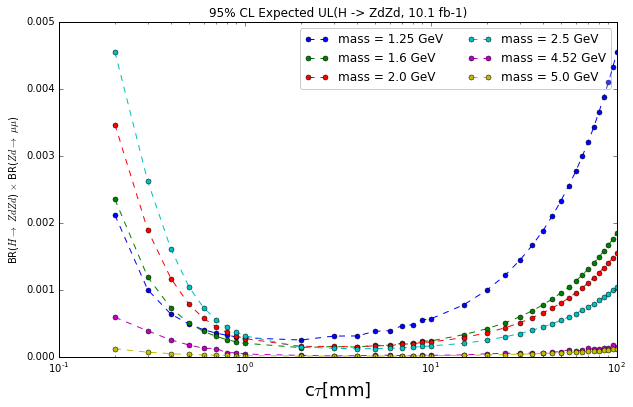

In [9]:

ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
#ctaus = [0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

limits_mass1p15 = []
limits_mass1p6 = []
limits_mass1p25 = []
limits_mass2p0 = []
limits_mass2p25 = []
limits_mass2p5 = []
limits_mass4p16 = []
limits_mass4p52 = []
limits_mass5p0 = []

for k in range(len(ctaus)):
    limits_mass1p15.append(get_lim(1.15,ctaus[k]))
    limits_mass1p25.append(get_lim(1.25,ctaus[k]))
    limits_mass1p6.append(get_lim(1.6,ctaus[k]))
    limits_mass2p0.append(get_lim(2.0,ctaus[k]))
    limits_mass2p25.append(get_lim(2.25,ctaus[k]))
    limits_mass2p5.append(get_lim(2.5,ctaus[k]))
    limits_mass4p16.append(get_lim(4.16,ctaus[k]))
    limits_mass4p52.append(get_lim(4.52,ctaus[k]))
    limits_mass5p0.append(get_lim(5.0,ctaus[k]))
    
#print limits_mass2p0    

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(10,6))
#plt.plot(ctaus,limits_mass1p15,linestyle='--', marker='o', label= 'mass = 1.15 GeV',markersize=5)
plt.plot(ctaus,limits_mass1p25,linestyle='--', marker='o', label= 'mass = 1.25 GeV',markersize=5)
plt.plot(ctaus,limits_mass1p6,linestyle='--', marker='o', label= 'mass = 1.6 GeV',markersize=5)
plt.plot(ctaus,limits_mass2p0,linestyle='--', marker='o', label= 'mass = 2.0 GeV',markersize=5)
plt.plot(ctaus,limits_mass2p5,linestyle='--', marker='o', label= 'mass = 2.5 GeV',markersize=5)
#plt.plot(ctaus,limits_mass4p16,linestyle='--', marker='o', label= 'mass = 4.16 GeV',markersize=5)
plt.plot(ctaus,limits_mass4p52,linestyle='--', marker='o', label= 'mass = 4.52 GeV',markersize=5)
plt.plot(ctaus,limits_mass5p0,linestyle='--', marker='o', label= 'mass = 5.0 GeV',markersize=5)

plt.xlabel(r'c$\tau$[mm]', fontsize = 18)
plt.ylabel(r'BR($H \rightarrow$ $ZdZd$) $\times$ BR($Zd \rightarrow$ $\mu\mu$)')
plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
#plt.xlim(1e-7,2e-5)
plt.title("95% CL Expected UL(H -> ZdZd, 10.1 fb-1)")

plt.show()

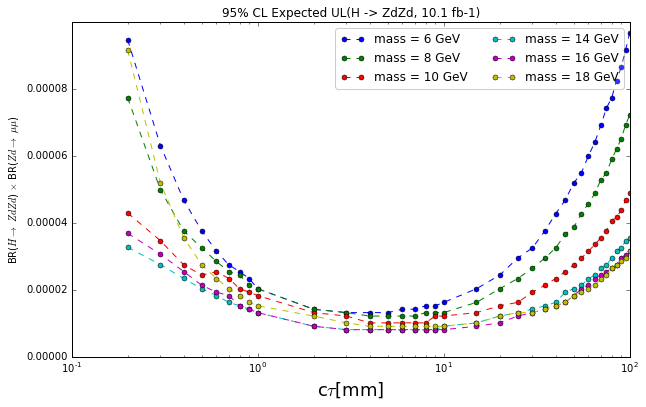

In [10]:

ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

limits_mass6 = []
limits_mass8 = []
limits_mass10 = []
limits_mass12 = []
limits_mass14 = []
limits_mass16 = []
limits_mass18 = []

for k in range(len(ctaus)):
    limits_mass6.append(get_lim(6,ctaus[k]))
    limits_mass8.append(get_lim(8,ctaus[k]))
    limits_mass10.append(get_lim(10,ctaus[k]))
    limits_mass12.append(get_lim(12,ctaus[k]))
    limits_mass14.append(get_lim(14,ctaus[k]))
    limits_mass16.append(get_lim(16,ctaus[k]))
    limits_mass18.append(get_lim(18,ctaus[k]))
    
    
#print limits_mass2p0    

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(10,6))
#plt.plot(ctaus,limits_mass1p25,linestyle='--', marker='o', label= 'mass = 1.25 GeV',markersize=5)
plt.plot(ctaus,limits_mass6,linestyle='--', marker='o', label= 'mass = 6 GeV',markersize=5)
plt.plot(ctaus,limits_mass8,linestyle='--', marker='o', label= 'mass = 8 GeV',markersize=5)
plt.plot(ctaus,limits_mass10,linestyle='--', marker='o', label= 'mass = 10 GeV',markersize=5)
#plt.plot(ctaus,limits_mass12,linestyle='--', marker='o', label= 'mass = 12 GeV',markersize=5)
plt.plot(ctaus,limits_mass14,linestyle='--', marker='o', label= 'mass = 14 GeV',markersize=5)
plt.plot(ctaus,limits_mass16,linestyle='--', marker='o', label= 'mass = 16 GeV',markersize=5)
plt.plot(ctaus,limits_mass18,linestyle='--', marker='o', label= 'mass = 18 GeV',markersize=5)

plt.xlabel(r'c$\tau$[mm]', fontsize = 18)
plt.ylabel(r'BR($H \rightarrow$ $ZdZd$) $\times$ BR($Zd \rightarrow$ $\mu\mu$)')
plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
#plt.xlim(1e-7,2e-5)
plt.title("95% CL Expected UL(H -> ZdZd, 10.1 fb-1)")

plt.show()

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-matplotlib/1.5.2-gnimlf2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


[-1.  -0.5  0.   0.5  1.   1.5  2. ]
['4.8777e-06', '2.7429e-06', '1.5425e-06', '8.6739e-07', '4.8777e-07', '2.7429e-07', '1.5425e-07']


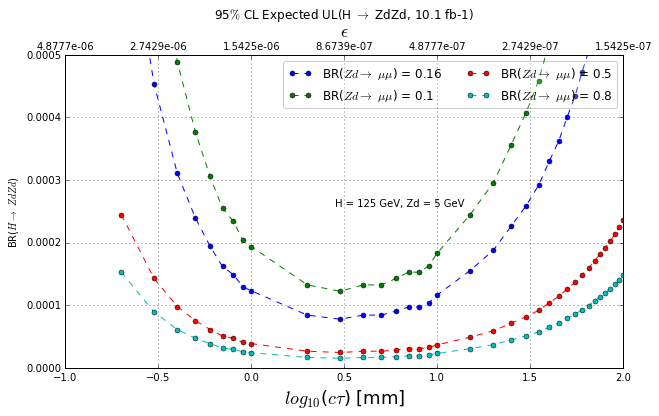

In [11]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps_m5p0 = []

limits_mass5p0 = np.array(limits_mass5p0)
ctaus=np.log10(np.array(ctaus))

# xticks1 = [0.1,1,10,100]
# xticks2 = []

# for j in range(len(xticks1)):
#     xticks2.append('{:.10f}'.format(get_eps(5.0,xticks1[j])))

# print xticks2
    
for i in range(len(ctaus)):
    eps_m5p0.append(get_eps(5.0, ctaus[i]))
from matplotlib import pyplot as plt


from matplotlib import rc
plt.rcParams.update({'font.size': 10})

fig = plt.figure(figsize=(10,6))
fig.text(0.5,0.5,r"H = 125 GeV, Zd = 5 GeV")

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(ctaus,limits_mass5p0/get_br(5.0),linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = {:.2f}'.format(get_br(5.0)),markersize=5)
ax1.plot(ctaus,limits_mass5p0/0.1,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.1',markersize=5)
ax1.plot(ctaus,limits_mass5p0/0.5,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.5',markersize=5)
ax1.plot(ctaus,limits_mass5p0/0.8,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.8',markersize=5)

ax1.legend(ncol=2,fancybox=True,framealpha=0.2)
ax1.grid(True)
# ax1.set_xticks(xticks1) 
#ax1.set_xscale("log")
#ax1.xlim([1,100])
ax1.set_ylim([0,0.0005])


# locs, labels= ax1.get_xticks()
# new_label=[10**float(item) for item in ctaus]
# ax1.set_xticks(loc, new_label)
# new_label=['{:.2e}'.format(10**el) for el in ctaus]
# ax1.set_xticklabels(new_label)


# ax1.set_xlabel()
ax1Xs = ax1.get_xticks()


print ax1Xs

ax2Xs = []
for X in ax1Xs:
    ax2Xs.append( '{:.4e}'.format(get_eps(5.0,10**X)) )

print ax2Xs

ax2.set_xticks(ax1Xs)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)


# ax2.set_xticks(xticks1)
# ax2.set_xticklabels(xticks2)

ax2.set_xlabel(r'$\epsilon$',fontsize=18)
#ax2.set_xscale("log")




ax1.set_xlabel(r'$log_{10}$($c\tau$) [mm]',fontsize=18)
ax1.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
#ax1.set_xscale("log")


title = ax1.set_title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")
title.set_y(1.1)
fig.subplots_adjust(top=0.85)


fig.show()

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


[-1.  -0.5  0.   0.5  1.   1.5  2. ]
['2.6923e-06', '1.5140e-06', '8.5137e-07', '4.7876e-07', '2.6923e-07', '1.5140e-07', '8.5137e-08']


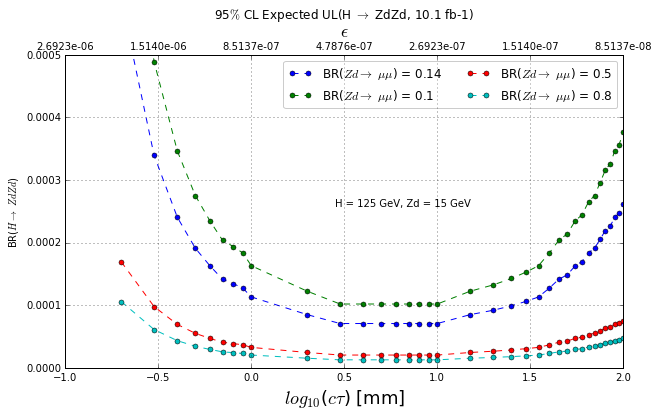

In [12]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps_m15 = []

limits_mass15 = []
for k in range(len(ctaus)):
    limits_mass15.append(get_lim(15,ctaus[k]))

limits_mass15 = np.array(limits_mass15)
ctaus=np.log10(np.array(ctaus))

# xticks1 = [0.1,1,10,100]
# xticks2 = []

# for j in range(len(xticks1)):
#     xticks2.append('{:.10f}'.format(get_eps(5.0,xticks1[j])))

# print xticks2
    
for i in range(len(ctaus)):
    eps_m15.append(get_eps(15.0, ctaus[i]))
from matplotlib import pyplot as plt


from matplotlib import rc
plt.rcParams.update({'font.size': 10})

fig = plt.figure(figsize=(10,6))
fig.text(0.5,0.5,r"H = 125 GeV, Zd = 15 GeV")

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(ctaus,limits_mass15/get_br(15.0),linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = {:.2f}'.format(get_br(15.0)),markersize=5)
ax1.plot(ctaus,limits_mass15/0.1,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.1',markersize=5)
ax1.plot(ctaus,limits_mass15/0.5,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.5',markersize=5)
ax1.plot(ctaus,limits_mass15/0.8,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.8',markersize=5)

ax1.legend(ncol=2,fancybox=True,framealpha=0.2)
ax1.grid(True)
# ax1.set_xticks(xticks1) 
#ax1.set_xscale("log")
#ax1.xlim([1,100])
ax1.set_ylim([0,0.0005])


# locs, labels= ax1.get_xticks()
# new_label=[10**float(item) for item in ctaus]
# ax1.set_xticks(loc, new_label)
# new_label=['{:.2e}'.format(10**el) for el in ctaus]
# ax1.set_xticklabels(new_label)


# ax1.set_xlabel()
ax1Xs = ax1.get_xticks()


print ax1Xs

ax2Xs = []
for X in ax1Xs:
    ax2Xs.append( '{:.4e}'.format(get_eps(15,10**X)) )

print ax2Xs

ax2.set_xticks(ax1Xs)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)


# ax2.set_xticks(xticks1)
# ax2.set_xticklabels(xticks2)

ax2.set_xlabel(r'$\epsilon$',fontsize=18)
#ax2.set_xscale("log")




ax1.set_xlabel(r'$log_{10}$($c\tau$) [mm]',fontsize=18)
ax1.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
#ax1.set_xscale("log")


title = ax1.set_title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")
title.set_y(1.1)
fig.subplots_adjust(top=0.85)


fig.show()

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


[-1.  -0.5  0.   0.5  1.   1.5  2. ]
['3.3643e-06', '1.8919e-06', '1.0639e-06', '5.9827e-07', '3.3643e-07', '1.8919e-07', '1.0639e-07']


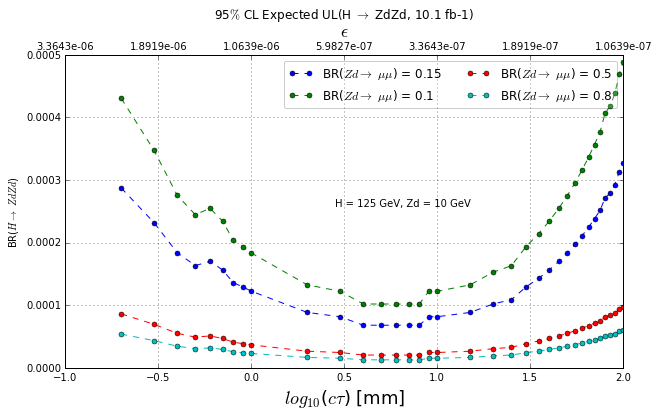

In [13]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps_m10 = []

limits_mass10 = []
for k in range(len(ctaus)):
    limits_mass10.append(get_lim(10,ctaus[k]))

limits_mass10 = np.array(limits_mass10)
ctaus=np.log10(np.array(ctaus))

# xticks1 = [0.1,1,10,100]
# xticks2 = []

# for j in range(len(xticks1)):
#     xticks2.append('{:.10f}'.format(get_eps(5.0,xticks1[j])))

# print xticks2
    
for i in range(len(ctaus)):
    eps_m10.append(get_eps(10.0, ctaus[i]))
from matplotlib import pyplot as plt


from matplotlib import rc
plt.rcParams.update({'font.size': 10})

fig = plt.figure(figsize=(10,6))
fig.text(0.5,0.5,r"H = 125 GeV, Zd = 10 GeV")

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(ctaus,limits_mass10/get_br(10.0),linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = {:.2f}'.format(get_br(10.0)),markersize=5)
ax1.plot(ctaus,limits_mass10/0.1,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.1',markersize=5)
ax1.plot(ctaus,limits_mass10/0.5,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.5',markersize=5)
ax1.plot(ctaus,limits_mass10/0.8,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.8',markersize=5)

ax1.legend(ncol=2,fancybox=True,framealpha=0.2)
ax1.grid(True)
# ax1.set_xticks(xticks1) 
#ax1.set_xscale("log")
#ax1.xlim([1,100])
ax1.set_ylim([0,0.0005])


# locs, labels= ax1.get_xticks()
# new_label=[10**float(item) for item in ctaus]
# ax1.set_xticks(loc, new_label)
# new_label=['{:.2e}'.format(10**el) for el in ctaus]
# ax1.set_xticklabels(new_label)


# ax1.set_xlabel()
ax1Xs = ax1.get_xticks()


print ax1Xs

ax2Xs = []
for X in ax1Xs:
    ax2Xs.append( '{:.4e}'.format(get_eps(10.0,10**X)) )

print ax2Xs

ax2.set_xticks(ax1Xs)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)


# ax2.set_xticks(xticks1)
# ax2.set_xticklabels(xticks2)

ax2.set_xlabel(r'$\epsilon$',fontsize=18)
#ax2.set_xscale("log")




ax1.set_xlabel(r'$log_{10}$($c\tau$) [mm]',fontsize=18)
ax1.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
#ax1.set_xscale("log")


title = ax1.set_title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")
title.set_y(1.1)
fig.subplots_adjust(top=0.85)


fig.show()

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


[-1.  -0.5  0.   0.5  1.   1.5  2. ]
['2.4790e-05', '1.3940e-05', '7.8392e-06', '4.4083e-06', '2.4790e-06', '1.3940e-06', '7.8392e-07']


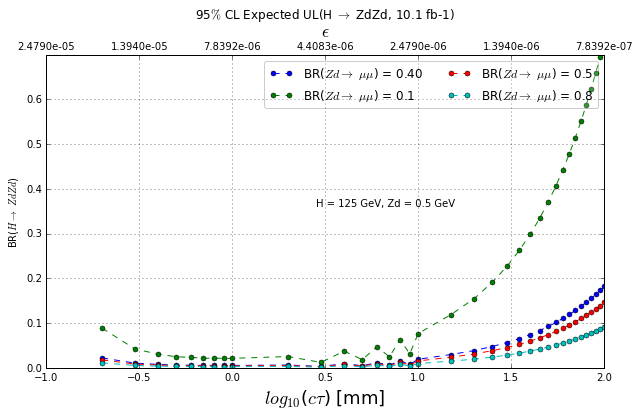

In [70]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps_m0p5 = []

limits_mass0p5 = []
for k in range(len(ctaus)):
    limits_mass0p5.append(get_lim(0.5,ctaus[k]))

limits_mass0p5 = np.array(limits_mass0p5)
ctaus=np.log10(np.array(ctaus))

# xticks1 = [0.1,1,10,100]
# xticks2 = []

# for j in range(len(xticks1)):
#     xticks2.append('{:.10f}'.format(get_eps(5.0,xticks1[j])))

# print xticks2
    
for i in range(len(ctaus)):
    eps_m0p5.append(get_eps(0.5, ctaus[i]))
from matplotlib import pyplot as plt


from matplotlib import rc
plt.rcParams.update({'font.size': 10})

fig = plt.figure(figsize=(10,6))
fig.text(0.5,0.5,r"H = 125 GeV, Zd = 0.5 GeV")

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(ctaus,limits_mass0p5/get_br(0.5),linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = {:.2f}'.format(get_br(0.5)),markersize=5)
ax1.plot(ctaus,limits_mass0p5/0.1,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.1',markersize=5)
ax1.plot(ctaus,limits_mass0p5/0.5,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.5',markersize=5)
ax1.plot(ctaus,limits_mass0p5/0.8,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.8',markersize=5)

ax1.legend(ncol=2,fancybox=True,framealpha=0.2)
ax1.grid(True)
# ax1.set_xticks(xticks1) 
#ax1.set_xscale("log")
#ax1.xlim([1,100])
ax1.set_ylim([0,0.7])


# locs, labels= ax1.get_xticks()
# new_label=[10**float(item) for item in ctaus]
# ax1.set_xticks(loc, new_label)
# new_label=['{:.2e}'.format(10**el) for el in ctaus]
# ax1.set_xticklabels(new_label)


# ax1.set_xlabel()
ax1Xs = ax1.get_xticks()


print ax1Xs

ax2Xs = []
for X in ax1Xs:
    ax2Xs.append( '{:.4e}'.format(get_eps(0.5,10**X)) )

print ax2Xs

ax2.set_xticks(ax1Xs)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)


# ax2.set_xticks(xticks1)
# ax2.set_xticklabels(xticks2)

ax2.set_xlabel(r'$\epsilon$',fontsize=18)
#ax2.set_xscale("log")




ax1.set_xlabel(r'$log_{10}$($c\tau$) [mm]',fontsize=18)
ax1.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
#ax1.set_xscale("log")


title = ax1.set_title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")
title.set_y(1.1)
fig.subplots_adjust(top=0.85)


fig.show()

In [ ]:
def ContourPlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot(x_data, y_data, 'o')

    axes.set_title('Contour Plot') # add a title for contour plot                                                                            
    axes.set_xlabel('mass') # X axis data label                                                                                              
    axes.set_ylabel('ctau(in mm)') # Y axis data label                                                                                       

    CS = matplotlib.pyplot.contour(X, Y, Z, numberOfContourLines, colors='k')
    matplotlib.pyplot.clabel(CS, inline=1, fontsize=10) # labels for contours                                                                

    plt.show()
    plt.close('all')


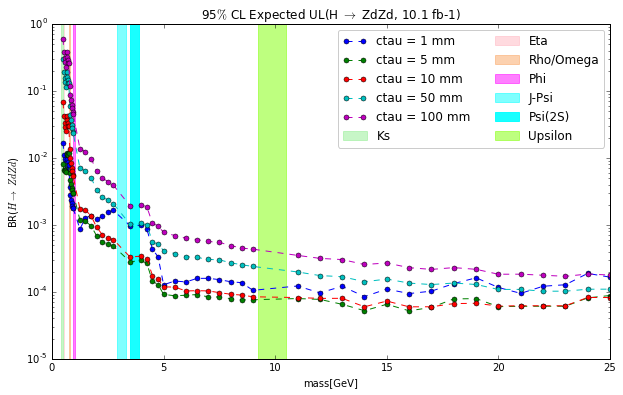

In [120]:
masses = [0.5,0.525,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.8,0.825,0.85,0.875,0.9,0.925,0.95,1.25,1.5,1.75,2,2.25,2.5,2.75,3.5,4,4.25,4.5,4.75,5,5.5,6,6.5,7,7.5,8,8.5,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

limits_ctau1 = []
limits_ctau5 = []
limits_ctau10 = []
limits_ctau50 = []
limits_ctau100 = []

for k in range(len(masses)):
    limits_ctau1.append(get_lim(masses[k],1)/get_br(masses[k]))
    limits_ctau5.append(get_lim(masses[k],5)/get_br(masses[k]))
    limits_ctau10.append(get_lim(masses[k],10)/get_br(masses[k]))
    limits_ctau50.append(get_lim(masses[k],50)/get_br(masses[k]))
    limits_ctau100.append(get_lim(masses[k],100)/get_br(masses[k]))

# print limits_ctau1
# print limits_ctau10
# print limits_ctau100

from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 10})

plt.plot(masses,limits_ctau1,linestyle='--', marker='o', label= 'ctau = 1 mm',markersize=5)
plt.plot(masses,limits_ctau5,linestyle='--', marker='o', label= 'ctau = 5 mm',markersize=5)
plt.plot(masses,limits_ctau10,linestyle='--', marker='o', label= 'ctau = 10 mm',markersize=5)
plt.plot(masses,limits_ctau50,linestyle='--', marker='o', label= 'ctau = 50 mm',markersize=5)
plt.plot(masses,limits_ctau100,linestyle='--', marker='o', label= 'ctau = 100 mm',markersize=5)
                                                         
    
plt.axvspan(0.42, 0.49, alpha=0.5, color='lightgreen', label = "Ks")
plt.axvspan(0.54, 0.55, alpha=0.5, color='lightpink', label = "Eta")
plt.axvspan(0.76, 0.79, alpha=0.5, color='sandybrown', label = "Rho/Omega")
plt.axvspan(0.95, 1.05, alpha=0.5, color='magenta', label = "Phi")
plt.axvspan(2.9, 3.3, alpha=0.5, color='cyan', label = "J-Psi")
plt.axvspan(3.5, 3.9, alpha=0.9, color='cyan', label = "Psi(2S)")
plt.axvspan(9.25, 10.5, alpha=0.5, color='chartreuse', label = "Upsilon")


plt.xlabel('mass[GeV]')
plt.ylabel(r'BR($H \rightarrow$ $ZdZd$)')
plt.yscale("log")
#plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")

plt.show()

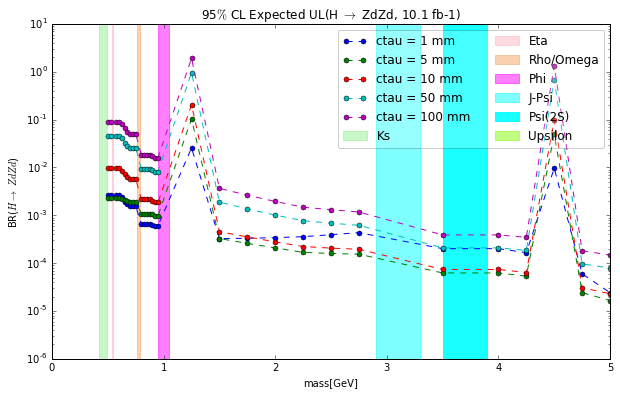

In [13]:
masses = [0.5,0.525,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.8,0.825,0.85,0.875,0.9,0.925,0.95,1.25,1.5,1.75,2,2.25,2.5,2.75,3.5,4,4.25,4.5,4.75,5,5.5,6,6.5,7,7.5,8,8.5,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

limits_ctau1 = []
limits_ctau5 = []
limits_ctau10 = []
limits_ctau50 = []
limits_ctau100 = []

for k in range(len(masses)):
    limits_ctau1.append(get_lim(masses[k],1)/0.8)
    limits_ctau5.append(get_lim(masses[k],5)/0.8)
    limits_ctau10.append(get_lim(masses[k],10)/0.8)
    limits_ctau50.append(get_lim(masses[k],50)/0.8)
    limits_ctau100.append(get_lim(masses[k],100)/0.8)

# print limits_ctau1
# print limits_ctau10
# print limits_ctau100

from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 10})

plt.plot(masses,limits_ctau1,linestyle='--', marker='o', label= 'ctau = 1 mm',markersize=5)
plt.plot(masses,limits_ctau5,linestyle='--', marker='o', label= 'ctau = 5 mm',markersize=5)
plt.plot(masses,limits_ctau10,linestyle='--', marker='o', label= 'ctau = 10 mm',markersize=5)
plt.plot(masses,limits_ctau50,linestyle='--', marker='o', label= 'ctau = 50 mm',markersize=5)
plt.plot(masses,limits_ctau100,linestyle='--', marker='o', label= 'ctau = 100 mm',markersize=5)
                                                         
    
plt.axvspan(0.42, 0.49, alpha=0.5, color='lightgreen', label = "Ks")
plt.axvspan(0.54, 0.55, alpha=0.5, color='lightpink', label = "Eta")
plt.axvspan(0.76, 0.79, alpha=0.5, color='sandybrown', label = "Rho/Omega")
plt.axvspan(0.95, 1.05, alpha=0.5, color='magenta', label = "Phi")
plt.axvspan(2.9, 3.3, alpha=0.5, color='cyan', label = "J-Psi")
plt.axvspan(3.5, 3.9, alpha=0.9, color='cyan', label = "Psi(2S)")
plt.axvspan(9.25, 10.5, alpha=0.5, color='chartreuse', label = "Upsilon")


plt.xlabel('mass[GeV]')
plt.ylabel(r'BR($H \rightarrow$ $ZdZd$)')
plt.yscale("log")
#plt.xscale("log")
plt.xlim(0,5)
plt.ylim(1e-6,10)

plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")

plt.show()

TypeError: Input z must be a 2D array.

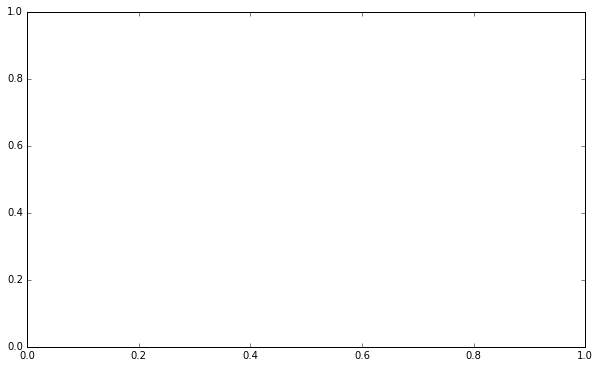

In [150]:
masses = [5,5.5,6,6.5,7,7.5,8,8.5,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
ctaus = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

mass = []
ctau = []
limits = []

for j in range(len(masses)):
    #limits.append([])
    for k in range(len(ctaus)):
        mass.append(masses[j])
        ctau.append(ctaus[k])
        limits.append(get_lim(masses[j],ctaus[k]))

# mass = np.array(mass)
# ctau = np.array(ctau)
# limits = np.array(limits)

# print masses.shape,ctaus.shape,limits.shape

# print masses
# print ctaus
# print limits

from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
from matplotlib import rc
plt.rcParams.update({'font.size': 10})

#plt.tricontourf(mass,ctau,limits, 1000)
#plt.tripcolor(mass,ctau,limits, 1000)
plt.contour(mass, ctau, limits, 20, colors='k')

plt.xscale("log")
plt.yscale("log")

#plt.contour(masses, ctaus, limits, 15, linewidths = 0.5, colors = 'k')
#plt.pcolormesh(mass, ctau, limits, cmap = plt.get_cmap('rainbow'))


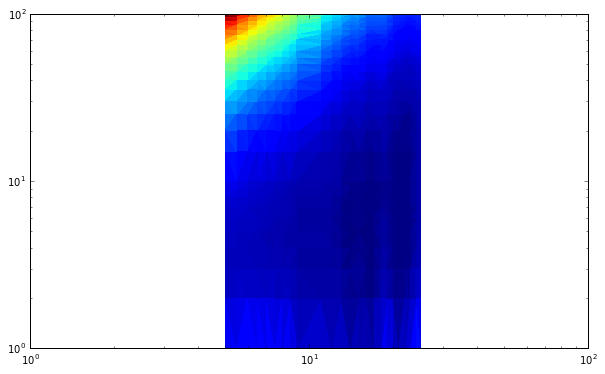

In [149]:
masses = [0.5,0.525,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.8,0.825,0.85,0.875,0.9,0.925,0.95,1.25,1.5,1.75,2,2.25,2.5,2.75,3.5,4,4.25,4.5,4.75,5,5.5,6,6.5,7,7.5,8,8.5,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

masses = [5,5.5,6,6.5,7,7.5,8,8.5,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
ctaus = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

mass = []
ctau = []
limits = []

for j in range(len(masses)):
    #limits.append([])
    for k in range(len(ctaus)):
        mass.append(masses[j])
        ctau.append(ctaus[k])
        limits.append(get_lim(masses[j],ctaus[k]))

# mass = np.array(mass)
# ctau = np.array(ctau)
# limits = np.array(limits)

# print masses.shape,ctaus.shape,limits.shape

# print masses
# print ctaus
# print limits

from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
from matplotlib import rc
plt.rcParams.update({'font.size': 10})

#plt.tricontourf(mass,ctau,limits, 1000)
#plt.tripcolor(mass,ctau,limits, 1000)


plt.xscale("log")
plt.yscale("log")

#plt.contour(masses, ctaus, limits, 15, linewidths = 0.5, colors = 'k')
#plt.pcolormesh(mass, ctau, limits, cmap = plt.get_cmap('rainbow'))


In [6]:
limits = pd.read_csv("~/nobackup/Jupyter/hzd_brlimits_exp50.csv")
limits

,mass,ctau = 0.1,ctau = 0.2,ctau = 0.3,ctau = 0.4,ctau = 0.5,ctau = 0.6,ctau = 0.7,ctau = 0.8,ctau = 0.9,...,ctau = 55,ctau = 60,ctau = 65,ctau = 70,ctau = 75,ctau = 80,ctau = 85,ctau = 90,ctau = 95,ctau = 100
0,0.500,0.134042,0.021293,0.013665,0.009020,0.008006,0.007227,0.007063,0.006782,0.007372,...,0.133833,0.145885,0.157841,0.169893,0.181752,0.193610,0.205468,0.217327,0.229186,0.241044
1,0.525,0.055857,0.014517,0.008797,0.006145,0.005223,0.004848,0.004581,0.004529,0.004729,...,0.085429,0.092815,0.100105,0.107686,0.115072,0.122652,0.130038,0.137646,0.145309,0.153668
2,0.550,0.049088,0.012363,0.006864,0.005003,0.004037,0.003848,0.003486,0.003545,0.003536,...,0.063269,0.068809,0.074252,0.079695,0.085429,0.090871,0.096313,0.102062,0.107547,0.113870
3,0.575,0.046957,0.011637,0.005901,0.004407,0.003418,0.003322,0.002931,0.003023,0.002912,...,0.052578,0.057146,0.061714,0.066476,0.070947,0.075612,0.080180,0.084850,0.089432,0.094324
4,0.600,0.044190,0.010396,0.004990,0.003740,0.002876,0.002816,0.002469,0.002570,0.002448,...,0.046068,0.050052,0.054134,0.058216,0.062298,0.066283,0.070463,0.074545,0.078530,0.082612
5,0.625,0.042069,0.008772,0.004232,0.003092,0.002436,0.002327,0.002096,0.002138,0.002068,...,0.038685,0.042087,0.045586,0.048988,0.052486,0.055888,0.059289,0.062690,0.066188,0.069490
6,0.650,0.038239,0.006976,0.003417,0.002426,0.001969,0.001839,0.001701,0.001699,0.001673,...,0.031299,0.034020,0.036839,0.039657,0.042379,0.045197,0.047919,0.050737,0.053556,0.056272
7,0.675,0.034048,0.006033,0.002996,0.002092,0.001728,0.001588,0.001490,0.001468,0.001460,...,0.026672,0.029043,0.031395,0.033728,0.036158,0.038491,0.040921,0.043156,0.045586,0.047914
8,0.700,0.029668,0.005252,0.002630,0.001822,0.001527,0.001392,0.001319,0.001291,0.001290,...,0.023726,0.025864,0.028003,0.030092,0.032182,0.034311,0.036449,0.038587,0.040629,0.042665
9,0.725,0.025366,0.004697,0.002384,0.001638,0.001386,0.001257,0.001197,0.001168,0.001168,...,0.021499,0.023395,0.025300,0.027244,0.029139,0.031034,0.032939,0.034893,0.036739,0.038682


In [7]:
limits.iloc[32,0:]

mass          4.500000
ctau = 0.1    0.000932
ctau = 0.2    0.000595
ctau = 0.3    0.000359
ctau = 0.4    0.000247
ctau = 0.5    0.000182
ctau = 0.6    0.000142
ctau = 0.7    0.000113
ctau = 0.8    0.000094
ctau = 0.9    0.000079
ctau = 1      0.000069
ctau = 2      0.000031
ctau = 3      0.000025
ctau = 4      0.000023
ctau = 5      0.000023
ctau = 6      0.000024
ctau = 7      0.000024
ctau = 8      0.000025
ctau = 9      0.000026
ctau = 10     0.000028
ctau = 15     0.000036
ctau = 20     0.000044
ctau = 25     0.000051
ctau = 30     0.000058
ctau = 35     0.000066
ctau = 40     0.000074
ctau = 45     0.000082
ctau = 50     0.000089
ctau = 55     0.000097
ctau = 60     0.000106
ctau = 65     0.000114
ctau = 70     0.000121
ctau = 75     0.000128
ctau = 80     0.000137
ctau = 85     0.000145
ctau = 90     0.000153
ctau = 95     0.000160
ctau = 100    0.000168
Name: 32, dtype: float64

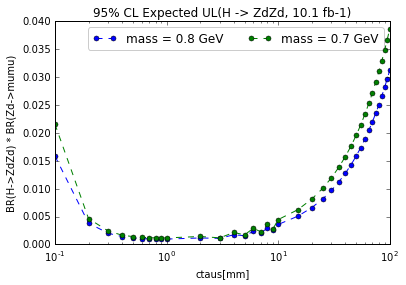

In [10]:
ctaus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
limits.iloc[26,2:]

from matplotlib import pyplot as plt
plt.plot(ctaus,limits.iloc[12,1:],linestyle='--', marker='o', label= 'mass = 0.8 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[10,1:],linestyle='--', marker='o', label= 'mass = 0.7 GeV',markersize=5)
plt.xlabel('ctaus[mm]')
plt.ylabel('BR(H->ZdZd) * BR(Zd->mumu)')
plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.title("95% CL Expected UL(H -> ZdZd, 10.1 fb-1)")

plt.show()

In [22]:
masses = [0.5,0.525,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.8,0.825,0.85,0.875,0.9,0.925,0.95,1.25,1.5,1.75,2,2.25,2.5,2.75,3.5,4,4.25,4.5,4.75,5,5.5,6,6.5,7,7.5,8,8.5,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps = []
for i in range(len(masses)):
    temp = []
    for j in range(len(ctaus)):
        temp.append(get_eps(masses[i], ctaus[j]))
    eps.append(temp)
print len(eps[0])
print eps[0][0],eps[0][35]
epsdown = []
epsup = []
for i in range(len(masses)):
    epsdown.append(eps[i][0])
    epsup.append(eps[i][35])
print epsdown

36
1.752900049687122e-05 7.839207337726327e-07
[1.752900049687122e-05, 1.752900049687122e-05, 1.3895937494525697e-05, 1.3895937494525697e-05, 1.3895937494525697e-05, 8.965330392916537e-06, 8.965330392916537e-06, 8.965330392916537e-06, 8.965330392916537e-06, 8.965330392916537e-06, 1.056032756319157e-05, 1.056032756319157e-05, 1.056032756319157e-05, 1.056032756319157e-05, 1.056032756319157e-05, 1.056032756319157e-05, 1.056032756319157e-05, 1.0354060450721146e-05, 7.707937841271352e-06, 6.916140596215521e-06, 6.723774886221143e-06, 6.262739118441218e-06, 5.868218902369571e-06, 5.705452905370957e-06, 5.022752920968819e-06, 4.033217870749724e-06, 3.692466633414666e-06, 3.651440465661074e-06, 3.5452756150497885e-06, 3.4490330610850145e-06, 3.2857149311450275e-06, 3.139838895741854e-06, 2.971551600269603e-06, 2.841900349985418e-06, 2.7078884489943108e-06, 2.6638950448503337e-06, 2.6092168884874613e-06, 2.5102737735248783e-06, 2.246890796332759e-06, 2.1316073621013647e-06, 2.0469868692132416e-

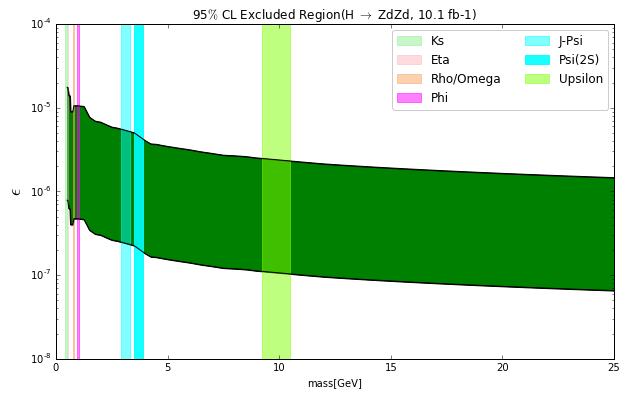

In [32]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 10})


#fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)

plt.plot(masses, epsdown, masses, epsup, color='black')

#.plot(masses,,linestyle='--', marker='o', label= 'ctau = 1 mm',markersize=5)
    
plt.axvspan(0.42, 0.49, alpha=0.5, color='lightgreen', label = "Ks")
plt.axvspan(0.54, 0.55, alpha=0.5, color='lightpink', label = "Eta")
plt.axvspan(0.76, 0.79, alpha=0.5, color='sandybrown', label = "Rho/Omega")
plt.axvspan(0.95, 1.05, alpha=0.5, color='magenta', label = "Phi")
plt.axvspan(2.9, 3.3, alpha=0.5, color='cyan', label = "J-Psi")
plt.axvspan(3.5, 3.9, alpha=0.9, color='cyan', label = "Psi(2S)")
plt.axvspan(9.25, 10.5, alpha=0.5, color='chartreuse', label = "Upsilon")

plt.fill_between(masses, epsdown, epsup, facecolor='green', interpolate=True)


plt.xlabel('mass[GeV]')
plt.ylabel(r'$\epsilon$',fontsize=18)
plt.yscale("log")
#plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.title(r"95$\%$ CL Excluded Region(H $\rightarrow$ ZdZd, 10.1 fb-1)")

plt.show()

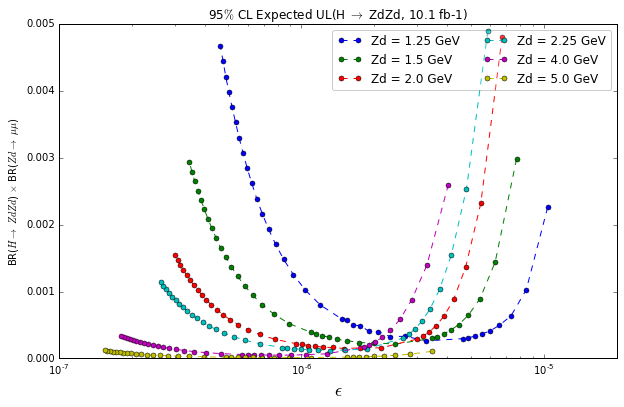

In [75]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
limits.iloc[26,2:]

eps_m0p5 = []
eps_m1p25 = []
eps_m1p5 = []
eps_m2p0 = []
eps_m2p5 = []
eps_m4p0 = []
eps_m5p0 = []

for i in range(len(ctaus)):
    eps_m0p5.append(get_eps(0.5, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m1p25.append(get_eps(1.25, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m1p5.append(get_eps(1.5, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m2p0.append(get_eps(2.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m2p5.append(get_eps(2.5, ctaus[i]))
for i in range(len(ctaus)):
    eps_m4p0.append(get_eps(4.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m5p0.append(get_eps(5.0, ctaus[i]))
    
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(10,6))
plt.plot(eps_m1p25,limits.iloc[19,2:],linestyle='--', marker='o', label= 'Zd = 1.25 GeV',markersize=5)
plt.plot(eps_m1p5,limits.iloc[20,2:],linestyle='--', marker='o', label= 'Zd = 1.5 GeV',markersize=5)
plt.plot(eps_m2p0,limits.iloc[22,2:],linestyle='--', marker='o', label= 'Zd = 2.0 GeV',markersize=5)
plt.plot(eps_m2p5,limits.iloc[23,2:],linestyle='--', marker='o', label= 'Zd = 2.25 GeV',markersize=5)
plt.plot(eps_m4p0,limits.iloc[30,2:],linestyle='--', marker='o', label= 'Zd = 4.0 GeV',markersize=5)
plt.plot(eps_m5p0,limits.iloc[34,2:],linestyle='--', marker='o', label= 'Zd = 5.0 GeV',markersize=5)

plt.xlabel(r'$\epsilon$', fontsize = 18)
plt.ylabel(r'BR($H \rightarrow$ $ZdZd$) $\times$ BR($Zd \rightarrow$ $\mu\mu$)')
plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.xlim(1e-7,2e-5)
plt.title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")

plt.show()

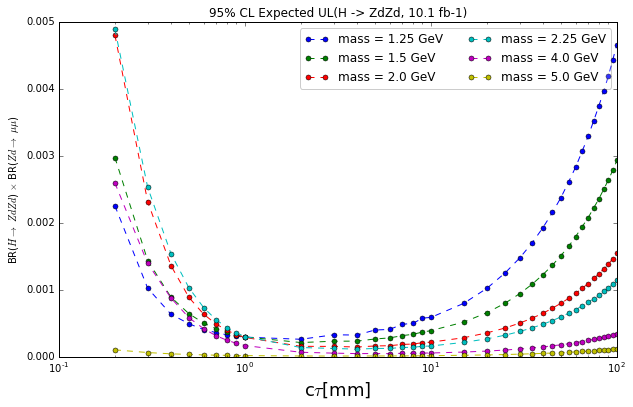

In [86]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
limits.iloc[26,2:]

eps_m0p5 = []
eps_m1p25 = []
eps_m1p5 = []
eps_m2p0 = []
eps_m2p5 = []
eps_m4p0 = []
eps_m5p0 = []

for i in range(len(ctaus)):
    eps_m0p5.append(get_eps(0.5, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m1p25.append(get_eps(1.25, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m1p5.append(get_eps(1.5, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m2p0.append(get_eps(2.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m2p5.append(get_eps(2.5, ctaus[i]))
for i in range(len(ctaus)):
    eps_m4p0.append(get_eps(4.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m5p0.append(get_eps(5.0, ctaus[i]))
    
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(10,6))
plt.plot(ctaus,limits.iloc[19,2:],linestyle='--', marker='o', label= 'mass = 1.25 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[20,2:],linestyle='--', marker='o', label= 'mass = 1.5 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[22,2:],linestyle='--', marker='o', label= 'mass = 2.0 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[23,2:],linestyle='--', marker='o', label= 'mass = 2.25 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[30,2:],linestyle='--', marker='o', label= 'mass = 4.0 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[34,2:],linestyle='--', marker='o', label= 'mass = 5.0 GeV',markersize=5)

plt.xlabel(r'c$\tau$[mm]', fontsize = 18)
plt.ylabel(r'BR($H \rightarrow$ $ZdZd$) $\times$ BR($Zd \rightarrow$ $\mu\mu$)')
plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
#plt.xlim(1e-7,2e-5)
plt.title("95% CL Expected UL(H -> ZdZd, 10.1 fb-1)")

plt.show()

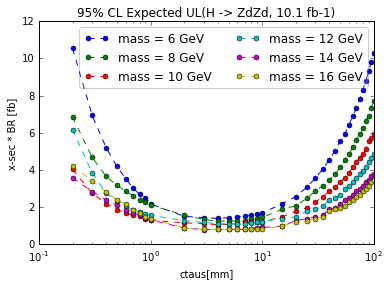

In [39]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
limits.iloc[26,2:]

from matplotlib import pyplot as plt
plt.plot(ctaus,limits.iloc[53,2:],linestyle='--', marker='o', label= 'mass = 6 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[57,2:],linestyle='--', marker='o', label= 'mass = 8 GeV',markersize=5)
#plt.plot(ctaus,limits.iloc[59,2:],linestyle='--', marker='o', label= 'mass = 9 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[22,2:],linestyle='--', marker='o', label= 'mass = 10 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[24,2:],linestyle='--', marker='o', label= 'mass = 12 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[26,2:],linestyle='--', marker='o', label= 'mass = 14 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[28,2:],linestyle='--', marker='o', label= 'mass = 16 GeV',markersize=5)
#plt.plot(ctaus,limits.iloc[30,2:],linestyle='--', marker='o', label= 'mass = 18 GeV',markersize=5)
#plt.plot(ctaus,limits.iloc[40,2:],linestyle='--', marker='o', label= 'mass = 25 GeV',markersize=5)


plt.xlabel('ctaus[mm]')
plt.ylabel('x-sec * BR [fb]')
plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.title("95% CL Expected UL(H -> ZdZd, 10.1 fb-1)")

plt.show()

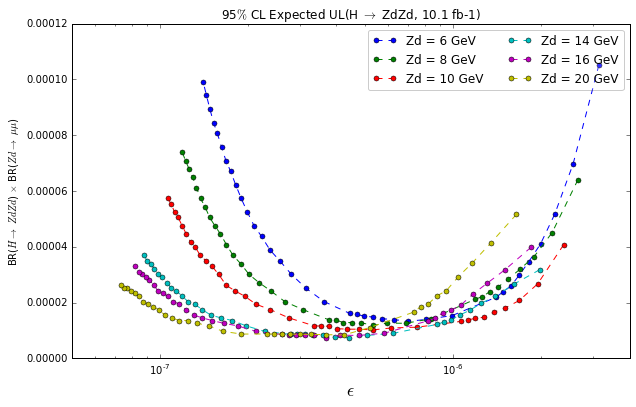

In [89]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
limits.iloc[26,2:]

eps_m6p0 = []
eps_m8p0 = []
eps_m10p0 = []
eps_m12p0 = []
eps_m14p0 = []
eps_m16p0 = []
eps_m18p0 = []
eps_m20p0 = []
eps_m25p0 = []

for i in range(len(ctaus)):
    eps_m6p0.append(get_eps(6.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m8p0.append(get_eps(8.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m10p0.append(get_eps(10.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m12p0.append(get_eps(12.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m14p0.append(get_eps(14.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m16p0.append(get_eps(16.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m18p0.append(get_eps(18.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m20p0.append(get_eps(20.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m25p0.append(get_eps(25.0, ctaus[i]))

from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))

plt.plot(eps_m6p0,limits.iloc[36,2:],linestyle='--', marker='o', label= 'Zd = 6 GeV',markersize=5)
plt.plot(eps_m8p0,limits.iloc[40,2:],linestyle='--', marker='o', label= 'Zd = 8 GeV',markersize=5)
plt.plot(eps_m10p0,limits.iloc[44,2:],linestyle='--', marker='o', label= 'Zd = 10 GeV',markersize=5)
#plt.plot(eps_m12p0,limits.iloc[46,2:],linestyle='--', marker='o', label= 'Zd = 12 GeV',markersize=5)
plt.plot(eps_m14p0,limits.iloc[48,2:],linestyle='--', marker='o', label= 'Zd = 14 GeV',markersize=5)
plt.plot(eps_m16p0,limits.iloc[50,2:],linestyle='--', marker='o', label= 'Zd = 16 GeV',markersize=5)
#plt.plot(eps_m18p0,limits.iloc[52,2:],linestyle='--', marker='o', label= 'Zd = 18 GeV',markersize=5)
plt.plot(eps_m20p0,limits.iloc[54,2:],linestyle='--', marker='o', label= 'Zd = 20 GeV',markersize=5)
#plt.plot(eps_m25p0,limits.iloc[59,2:],linestyle='--', marker='o', label= 'Zd = 25 GeV',markersize=5)

plt.xlabel(r'$\epsilon$', fontsize = 18)
plt.ylabel(r'BR($H \rightarrow$ $ZdZd$) $\times$ BR($Zd \rightarrow$ $\mu\mu$)')
plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.xlim(5e-8,4e-6)
plt.title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")

plt.show()

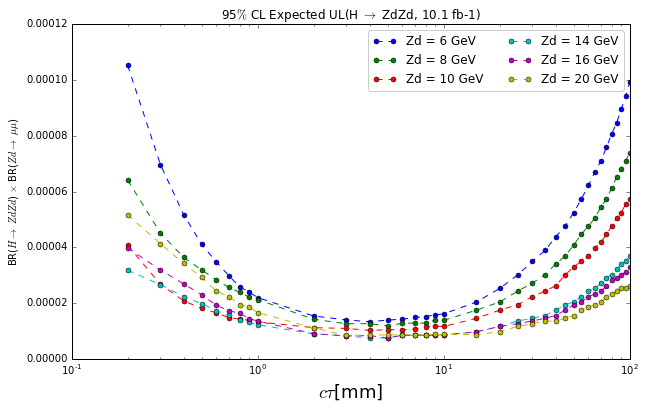

In [88]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
limits.iloc[26,2:]

eps_m6p0 = []
eps_m8p0 = []
eps_m10p0 = []
eps_m12p0 = []
eps_m14p0 = []
eps_m16p0 = []
eps_m18p0 = []
eps_m20p0 = []
eps_m25p0 = []

for i in range(len(ctaus)):
    eps_m6p0.append(get_eps(6.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m8p0.append(get_eps(8.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m10p0.append(get_eps(10.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m12p0.append(get_eps(12.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m14p0.append(get_eps(14.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m16p0.append(get_eps(16.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m18p0.append(get_eps(18.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m20p0.append(get_eps(20.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m25p0.append(get_eps(25.0, ctaus[i]))

from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))

plt.plot(ctaus,limits.iloc[36,2:],linestyle='--', marker='o', label= 'Zd = 6 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[40,2:],linestyle='--', marker='o', label= 'Zd = 8 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[44,2:],linestyle='--', marker='o', label= 'Zd = 10 GeV',markersize=5)
#plt.plot(ctaus,limits.iloc[46,2:],linestyle='--', marker='o', label= 'Zd = 12 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[48,2:],linestyle='--', marker='o', label= 'Zd = 14 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[50,2:],linestyle='--', marker='o', label= 'Zd = 16 GeV',markersize=5)
#plt.plot(ctaus,limits.iloc[52,2:],linestyle='--', marker='o', label= 'Zd = 18 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[54,2:],linestyle='--', marker='o', label= 'Zd = 20 GeV',markersize=5)
#plt.plot(ctaus,limits.iloc[59,2:],linestyle='--', marker='o', label= 'Zd = 25 GeV',markersize=5)

plt.xlabel(r'$c\tau$[mm]', fontsize = 18)
plt.ylabel(r'BR($H \rightarrow$ $ZdZd$) $\times$ BR($Zd \rightarrow$ $\mu\mu$)')
plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
#plt.xlim(5e-8,4e-6)
plt.title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")

plt.show()

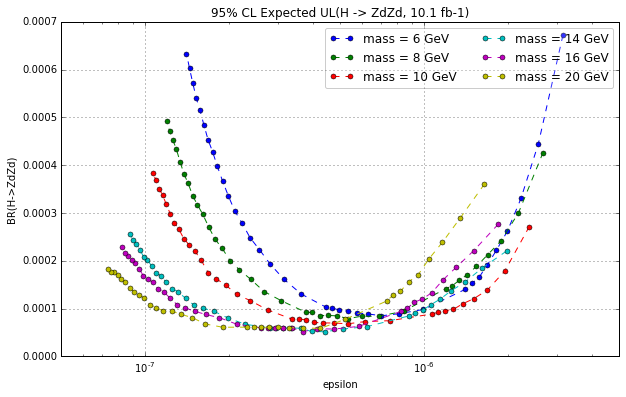

In [76]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
limits.iloc[26,2:]

# print get_br(6.0)
# print limits.iloc[36,2:]
# print limits.iloc[36,2:]/get_br(6.0)


eps_m6p0 = []
eps_m8p0 = []
eps_m10p0 = []
eps_m12p0 = []
eps_m14p0 = []
eps_m16p0 = []
eps_m18p0 = []
eps_m20p0 = []
eps_m25p0 = []


for i in range(len(ctaus)):
    eps_m6p0.append(get_eps(6.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m8p0.append(get_eps(8.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m10p0.append(get_eps(10.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m12p0.append(get_eps(12.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m14p0.append(get_eps(14.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m16p0.append(get_eps(16.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m18p0.append(get_eps(18.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m20p0.append(get_eps(20.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m25p0.append(get_eps(25.0, ctaus[i]))

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(10,6))

plt.plot(eps_m6p0,limits.iloc[36,2:]/get_br(6.0),linestyle='--', marker='o', label= 'mass = 6 GeV',markersize=5)
plt.plot(eps_m8p0,limits.iloc[40,2:]/get_br(8.0),linestyle='--', marker='o', label= 'mass = 8 GeV',markersize=5)
plt.plot(eps_m10p0,limits.iloc[44,2:]/get_br(10.0),linestyle='--', marker='o', label= 'mass = 10 GeV',markersize=5)
#plt.plot(eps_m12p0,limits.iloc[46,2:]/get_br(12.0),linestyle='--', marker='o', label= 'mass = 12 GeV',markersize=5)
plt.plot(eps_m14p0,limits.iloc[48,2:]/get_br(14.0),linestyle='--', marker='o', label= 'mass = 14 GeV',markersize=5)
plt.plot(eps_m16p0,limits.iloc[50,2:]/get_br(16.0),linestyle='--', marker='o', label= 'mass = 16 GeV',markersize=5)
#plt.plot(eps_m18p0,limits.iloc[52,2:]/get_br(18.0),linestyle='--', marker='o', label= 'mass = 18 GeV',markersize=5)
plt.plot(eps_m20p0,limits.iloc[54,2:]/get_br(20.0),linestyle='--', marker='o', label= 'mass = 20 GeV',markersize=5)
#plt.plot(eps_m25p0,limits.iloc[59,2:]/get_br(25.0),linestyle='--', marker='o', label= 'mass = 25 GeV',markersize=5)

plt.xlabel('epsilon')
plt.ylabel('BR(H->ZdZd)')
plt.xscale("log")
plt.xlim(5*1e-8,5*1e-6)
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.title("95% CL Expected UL(H -> ZdZd, 10.1 fb-1)")
plt.grid()
plt.show()

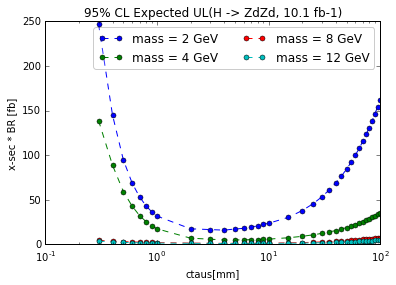

In [24]:
ctaus = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
limits.iloc[26,2:]

from matplotlib import pyplot as plt
plt.plot(ctaus,limits.iloc[5,3:],linestyle='--', marker='o', label= 'mass = 2 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[49,3:],linestyle='--', marker='o', label= 'mass = 4 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[57,3:],linestyle='--', marker='o', label= 'mass = 8 GeV',markersize=5)
plt.plot(ctaus,limits.iloc[24,3:],linestyle='--', marker='o', label= 'mass = 12 GeV',markersize=5)
plt.xlabel('ctaus[mm]')
plt.ylabel('x-sec * BR [fb]')
plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.title("95% CL Expected UL(H -> ZdZd, 10.1 fb-1)")

plt.show()

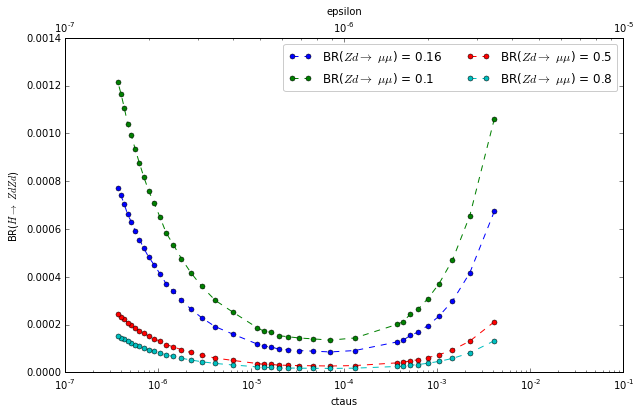

In [25]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


eps_m0p5 = []
eps_m1p25 = []
eps_m1p5 = []
eps_m2p0 = []
eps_m2p5 = []
eps_m4p0 = []
eps_m5p0 = []

for i in range(len(ctaus)):
    eps_m0p5.append(get_eps(0.5, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m1p25.append(get_eps(1.25, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m1p5.append(get_eps(1.5, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m2p0.append(get_eps(2.0, ctaus[i]))
for i in range(len(ctaus)):
    eps_m2p5.append(get_eps(2.5, ctaus[i]))
for i in range(len(ctaus)):
    eps_m4p0.append(get_eps(4.0, ctaus[i])) 
for i in range(len(ctaus)):
    eps_m5p0.append(get_eps(5.0, ctaus[i]))
    
from matplotlib import pyplot as plt

from matplotlib import rc


# #plt.style.library['seaborn-darkgrid']
# plt.style.library['seaborn-whitegrid']

# rc('text', usetex=True)
# rc('axes', linewidth=1)
# rc('font', weight='bold')
# plt.rcParams["font.weight"] = "bold"

#fig = plt.figure()


fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


new_tick_locations = np.array([0.1, 1, 10, 100])

def tick_function(X):
    V = get_eps(5.0,X)
    return ["%.10f" % z for z in V]

print tick_function(new_tick_locations)

#plt.plot(eps_m1p25,limits.iloc[19,2:],linestyle='--', marker='o', label= 'mass = 1.25 GeV',markersize=5)
#plt.plot(eps_m1p5,limits.iloc[20,2:],linestyle='--', marker='o', label= 'mass = 1.5 GeV',markersize=5)
#plt.plot(eps_m2p0,limits.iloc[22,2:],linestyle='--', marker='o', label= 'mass = 2.0 GeV',markersize=5)
# plt.plot(eps_m2p5,limits.iloc[23,2:],linestyle='--', marker='o', label= 'mass = 2.25 GeV',markersize=5)
#plt.plot(eps_m4p0,limits.iloc[30,2:],linestyle='--', marker='o', label= 'mass = 4.0 GeV',markersize=5)
plt.plot(eps_m5p0,limits.iloc[34,2:]/get_br(5.0),linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = {:.2f}'.format(get_br(5.0)),markersize=5)
plt.plot(eps_m5p0,limits.iloc[34,2:]/0.1,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.1',markersize=5)
plt.plot(eps_m5p0,limits.iloc[34,2:]/0.5,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.5',markersize=5)
plt.plot(eps_m5p0,limits.iloc[34,2:]/0.8,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.8',markersize=5)

#plt.xlabel('epsilon')
#plt.ylabel(r'BR($H \rightarrow$ $ZdZd$)')
plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
plt.xlim(1e-7,1e-5)
#plt.title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)[H = 125 GeV,Zd = 5 GeV]")
#plt.grid()

ax2.set_xlabel('epsilon')
#ax2.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
ax2.set_xscale("log")


ax1.set_xlabel('ctaus')
ax1.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
ax1.set_xscale("log")




plt.show()

['0.0000048777', '0.0000015425', '0.0000004878', '0.0000001542']


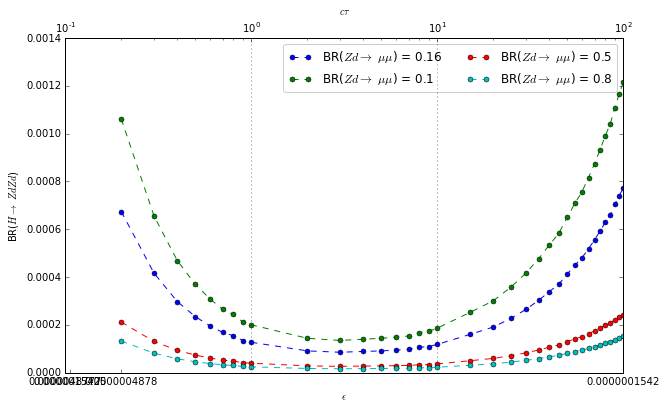

In [46]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps_m5p0 = []

for i in range(len(ctaus)):
    eps_m5p0.append(get_eps(5.0, ctaus[i]))
from matplotlib import pyplot as plt


from matplotlib import rc
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


new_tick_locations = np.array([0.1, 1, 10, 100])

def tick_function(X):
    V = get_eps(5.0,X)
    return ["%.10f" % z for z in V]

print tick_function(new_tick_locations)

plt.plot(ctaus,limits.iloc[34,2:]/get_br(5.0),linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = {:.2f}'.format(get_br(5.0)),markersize=5)
plt.plot(ctaus,limits.iloc[34,2:]/0.1,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.1',markersize=5)
plt.plot(ctaus,limits.iloc[34,2:]/0.5,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.5',markersize=5)
plt.plot(ctaus,limits.iloc[34,2:]/0.8,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.8',markersize=5)

plt.xscale("log")
plt.legend(ncol=2,fancybox=True,framealpha=0.2)
#plt.xlim(1e-7,1e-5)



ax2.set_xlabel(r'$c\tau$')
#ax2.set_xscale("log")


ax1.set_xlim(ax2.get_xlim())
ax1.set_xticks(new_tick_locations)
ax1.set_xticklabels(tick_function(new_tick_locations))

ax1.set_xlabel(r'$\epsilon$')
ax1.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
#ax1.set_xscale("log")

ax2.set_xticks(ax1Xs)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)

plt.grid()


plt.show()

In [39]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps_m5p0 = []

ctaus=np.log10(np.array(ctaus))
print(ctaus)
print(new_label)

[-0.69897    -0.52287875 -0.39794001 -0.30103    -0.22184875 -0.15490196
 -0.09691001 -0.04575749  0.          0.30103     0.47712125  0.60205999
  0.69897     0.77815125  0.84509804  0.90308999  0.95424251  1.
  1.17609126  1.30103     1.39794001  1.47712125  1.54406804  1.60205999
  1.65321251  1.69897     1.74036269  1.77815125  1.81291336  1.84509804
  1.87506126  1.90308999  1.92941893  1.95424251  1.97772361  2.        ]
['2.0000e-01', '3.0000e-01', '4.0000e-01', '5.0000e-01', '6.0000e-01', '7.0000e-01', '8.0000e-01', '9.0000e-01', '1.0000e+00', '2.0000e+00', '3.0000e+00', '4.0000e+00', '5.0000e+00', '6.0000e+00', '7.0000e+00', '8.0000e+00', '9.0000e+00', '1.0000e+01', '1.5000e+01', '2.0000e+01', '2.5000e+01', '3.0000e+01', '3.5000e+01', '4.0000e+01', '4.5000e+01', '5.0000e+01', '5.5000e+01', '6.0000e+01', '6.5000e+01', '7.0000e+01', '7.5000e+01', '8.0000e+01', '8.5000e+01', '9.0000e+01', '9.5000e+01', '1.0000e+02']


In [49]:
ax1.get_xticks()

array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])

['0.0000048777', '0.0000015425', '0.0000004878', '0.0000001542']
[-1.  -0.5  0.   0.5  1.   1.5  2. ]
['4.8777e-06', '2.7429e-06', '1.5425e-06', '8.6739e-07', '4.8777e-07', '2.7429e-07', '1.5425e-07']


/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


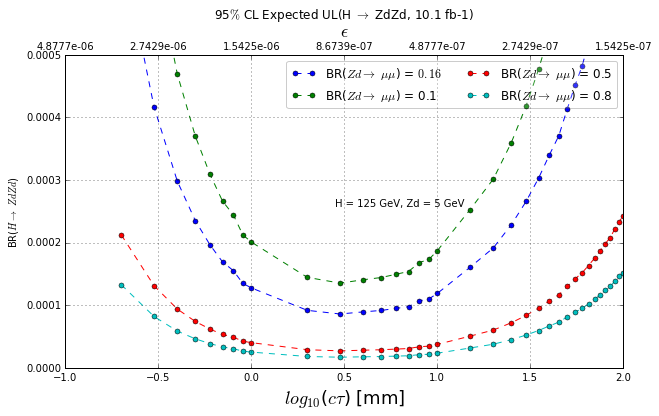

In [65]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps_m5p0 = []

ctaus=np.log10(np.array(ctaus))

# xticks1 = [0.1,1,10,100]
xticks2 = []

for j in range(len(xticks1)):
    xticks2.append('{:.10f}'.format(get_eps(5.0,xticks1[j])))

print xticks2
    
for i in range(len(ctaus)):
    eps_m5p0.append(get_eps(5.0, ctaus[i]))
from matplotlib import pyplot as plt


from matplotlib import rc
plt.rcParams.update({'font.size': 10})

fig = plt.figure(figsize=(10,6))
fig.text(0.5,0.5,r"H = 125 GeV, Zd = 5 GeV")

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(ctaus,limits.iloc[34,2:]/get_br(5.0),linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = {:.2f}'.format(get_br(5.0)),markersize=5)
ax1.plot(ctaus,limits.iloc[34,2:]/0.1,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.1',markersize=5)
ax1.plot(ctaus,limits.iloc[34,2:]/0.5,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.5',markersize=5)
ax1.plot(ctaus,limits.iloc[34,2:]/0.8,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.8',markersize=5)

ax1.legend(ncol=2,fancybox=True,framealpha=0.2)
ax1.grid(True)
# ax1.set_xticks(xticks1) 
#ax1.set_xscale("log")
#ax1.xlim([1,100])
ax1.set_ylim([0,0.0005])


# locs, labels= ax1.get_xticks()
# new_label=[10**float(item) for item in ctaus]
# ax1.set_xticks(loc, new_label)
# new_label=['{:.2e}'.format(10**el) for el in ctaus]
# ax1.set_xticklabels(new_label)


# ax1.set_xlabel()
ax1Xs = ax1.get_xticks()


print ax1Xs

ax2Xs = []
for X in ax1Xs:
    ax2Xs.append( '{:.4e}'.format(get_eps(5.0,10**X)) )

print ax2Xs

ax2.set_xticks(ax1Xs)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)


# ax2.set_xticks(xticks1)
# ax2.set_xticklabels(xticks2)

ax2.set_xlabel(r'$\epsilon$',fontsize=18)
#ax2.set_xscale("log")




ax1.set_xlabel(r'$log_{10}$($c\tau$) [mm]',fontsize=18)
ax1.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
#ax1.set_xscale("log")


title = ax1.set_title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")
title.set_y(1.1)
fig.subplots_adjust(top=0.85)


fig.show()

['0.0000026923', '0.0000008514', '0.0000002692', '0.0000000851']
[-1.  -0.5  0.   0.5  1.   1.5  2. ]
['2.6923e-06', '1.5140e-06', '8.5137e-07', '4.7876e-07', '2.6923e-07', '1.5140e-07', '8.5137e-08']


/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


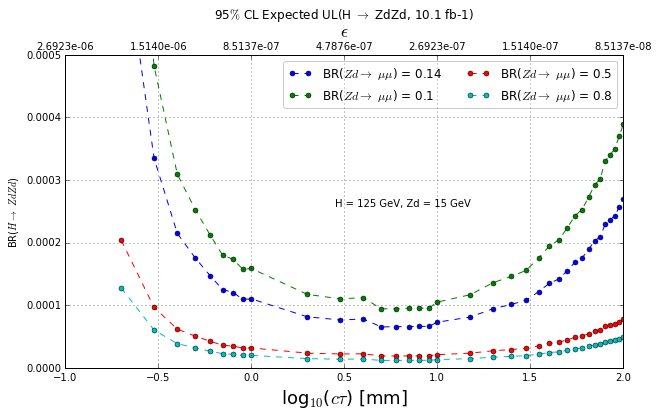

In [61]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps_m15p0 = []

ctaus=np.log10(np.array(ctaus))

xticks1 = [0.1,1,10,100]
xticks2 = []

for j in range(len(xticks1)):
    xticks2.append('{:.10f}'.format(get_eps(15.0,xticks1[j])))

print xticks2
    
for i in range(len(ctaus)):
    eps_m15p0.append(get_eps(15.0, ctaus[i]))
from matplotlib import pyplot as plt


from matplotlib import rc
plt.rcParams.update({'font.size': 10})

fig = plt.figure(figsize=(10,6))
fig.text(0.5,0.5,r"H = 125 GeV, Zd = 15 GeV")

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(ctaus,limits.iloc[49,2:]/get_br(15.0),linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = {:.2f}'.format(get_br(15.0)),markersize=5)
ax1.plot(ctaus,limits.iloc[49,2:]/0.1,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.1',markersize=5)
ax1.plot(ctaus,limits.iloc[49,2:]/0.5,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.5',markersize=5)
ax1.plot(ctaus,limits.iloc[49,2:]/0.8,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.8',markersize=5)

ax1.legend(ncol=2,fancybox=True,framealpha=0.2)
ax1.grid(True)
#ax1.set_xticks(xticks1) 
#ax1.set_xscale("log")
#ax1.xlim([1,100])
ax1.set_ylim([0,0.0005])


ax1Xs = ax1.get_xticks()

print ax1Xs

ax2Xs = []
for X in ax1Xs:
    ax2Xs.append( '{:.4e}'.format(get_eps(15.0,10**X)) )

print ax2Xs

ax2.set_xticks(ax1Xs)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)


# ax2.set_xticks(xticks1)
# ax2.set_xticklabels(xticks2)

ax2.set_xlabel(r'$\epsilon$',fontsize=18)
#ax2.set_xscale("log")


ax1.set_xlabel(r'log$_{10}$($c\tau$) [mm]',fontsize=18)
ax1.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
#ax1.set_xscale("log")


title = ax1.set_title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")
title.set_y(1.1)
fig.subplots_adjust(top=0.85)


fig.show()

['0.0000247898', '0.0000078392', '0.0000024790', '0.0000007839']
[-1.  -0.5  0.   0.5  1.   1.5  2. ]
['2.4790e-05', '1.3940e-05', '7.8392e-06', '4.4083e-06', '2.4790e-06', '1.3940e-06', '7.8392e-07']


/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


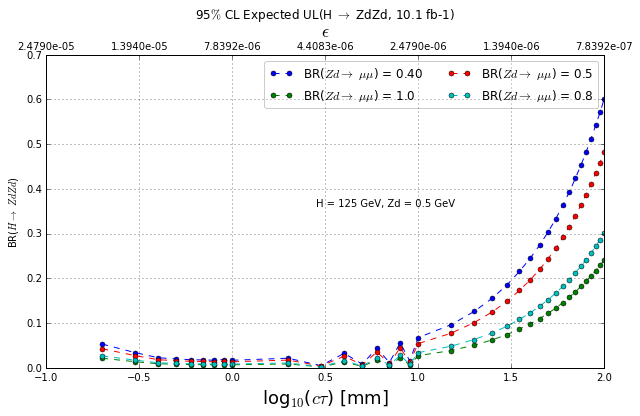

In [37]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps_m0p5 = []

ctaus=np.log10(np.array(ctaus))

xticks1 = [0.1,1,10,100]
xticks2 = []

for j in range(len(xticks1)):
    xticks2.append('{:.10f}'.format(get_eps(0.5,xticks1[j])))

print xticks2
    
for i in range(len(ctaus)):
    eps_m0p5.append(get_eps(0.5, ctaus[i]))
from matplotlib import pyplot as plt


from matplotlib import rc
plt.rcParams.update({'font.size': 10})

fig = plt.figure(figsize=(10,6))
fig.text(0.5,0.5,r"H = 125 GeV, Zd = 0.5 GeV")

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(ctaus,limits.iloc[0,2:]/get_br(0.5),linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = {:.2f}'.format(get_br(0.5)),markersize=5)
ax1.plot(ctaus,limits.iloc[0,2:]/1.0,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 1.0',markersize=5)
ax1.plot(ctaus,limits.iloc[0,2:]/0.5,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.5',markersize=5)
ax1.plot(ctaus,limits.iloc[0,2:]/0.8,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.8',markersize=5)

ax1.legend(ncol=2,fancybox=True,framealpha=0.2)
ax1.grid(True)
#ax1.set_xticks(xticks1) 
#ax1.set_xscale("log")
#ax1.xlim([1,100])
#ax1.set_ylim([0,0.0005])


ax1Xs = ax1.get_xticks()

print ax1Xs

ax2Xs = []
for X in ax1Xs:
    ax2Xs.append( '{:.4e}'.format(get_eps(0.5,10**X)) )

print ax2Xs

ax2.set_xticks(ax1Xs)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)


# ax2.set_xticks(xticks1)
# ax2.set_xticklabels(xticks2)

ax2.set_xlabel(r'$\epsilon$',fontsize=18)
#ax2.set_xscale("log")


ax1.set_xlabel(r'log$_{10}$($c\tau$) [mm]',fontsize=18)
ax1.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
#ax1.set_xscale("log")


title = ax1.set_title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")
title.set_y(1.1)
fig.subplots_adjust(top=0.85)


fig.show()

['0.0000020655', '0.0000006532', '0.0000002066', '0.0000000653']
[-1.  -0.5  0.   0.5  1.   1.5  2. ]
['2.0655e-06', '1.1615e-06', '6.5318e-07', '3.6731e-07', '2.0655e-07', '1.1615e-07', '6.5318e-08']


/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


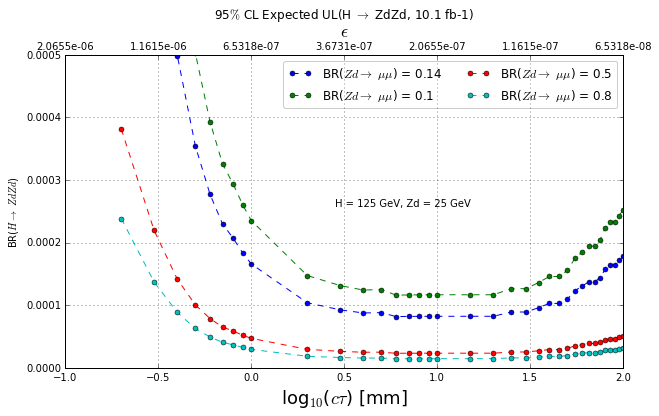

In [66]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps_m25p0 = []

ctaus=np.log10(np.array(ctaus))

xticks1 = [0.1,1,10,100]
xticks2 = []

for j in range(len(xticks1)):
    xticks2.append('{:.10f}'.format(get_eps(25.0,xticks1[j])))

print xticks2
    
for i in range(len(ctaus)):
    eps_m25p0.append(get_eps(25.0, ctaus[i]))
from matplotlib import pyplot as plt


from matplotlib import rc
plt.rcParams.update({'font.size': 10})

fig = plt.figure(figsize=(10,6))
fig.text(0.5,0.5,r"H = 125 GeV, Zd = 25 GeV")

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(ctaus,limits.iloc[59,2:]/get_br(25.0),linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = {:.2f}'.format(get_br(25.0)),markersize=5)
ax1.plot(ctaus,limits.iloc[59,2:]/0.1,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.1',markersize=5)
ax1.plot(ctaus,limits.iloc[59,2:]/0.5,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.5',markersize=5)
ax1.plot(ctaus,limits.iloc[59,2:]/0.8,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.8',markersize=5)

ax1.legend(ncol=2,fancybox=True,framealpha=0.2)
ax1.grid(True)
#ax1.set_xticks(xticks1) 
#ax1.set_xscale("log")
ax1.set_ylim([0,0.0005])

ax1Xs = ax1.get_xticks()

print ax1Xs

ax2Xs = []
for X in ax1Xs:
    ax2Xs.append( '{:.4e}'.format(get_eps(25.0,10**X)) )

print ax2Xs

ax2.set_xticks(ax1Xs)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)


# ax2.set_xticks(xticks1)
# ax2.set_xticklabels(xticks2)

ax2.set_xlabel(r'$\epsilon$',fontsize=18)
#ax2.set_xscale("log")


ax1.set_xlabel(r'log$_{10}$($c\tau$) [mm]',fontsize=18)
ax1.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
#ax1.set_xscale("log")


title = ax1.set_title(r"95$\%$ CL Expected UL(H $\rightarrow$ ZdZd, 10.1 fb-1)")
title.set_y(1.1)
fig.subplots_adjust(top=0.85)


fig.show()

In [80]:
varn=3.980
print {"%.2f" % varn}


set(['3.98'])


[1.e-08 1.e-07 1.e-06 1.e-05 1.e-04]


TypeError: set_xticks() takes at least 2 arguments (1 given)

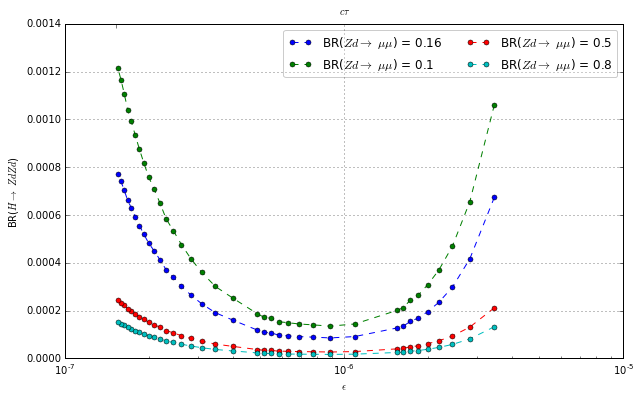

In [52]:
ctaus = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
eps_m5p0 = []

for i in range(len(ctaus)):
    eps_m5p0.append(get_eps(5.0, ctaus[i]))
from matplotlib import pyplot as plt


from matplotlib import rc
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(eps_m5p0,limits.iloc[34,2:]/get_br(5.0),linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = {:.2f}'.format(get_br(5.0)),markersize=5)
ax1.plot(eps_m5p0,limits.iloc[34,2:]/0.1,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.1',markersize=5)
ax1.plot(eps_m5p0,limits.iloc[34,2:]/0.5,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.5',markersize=5)
ax1.plot(eps_m5p0,limits.iloc[34,2:]/0.8,linestyle='--', marker='o', label= r'BR($Zd \rightarrow$ $\mu\mu$) = 0.8',markersize=5)

ax1.legend(ncol=2,fancybox=True,framealpha=0.2)
ax1.grid(True)
ax1.set_xscale("log")
#plt.xlim(1e-7,1e-5)


ax1Xs = ax1.get_xticks()

print ax1Xs

ax2Xs = []
# for X in ax1Xs:
#     ax2Xs.append(ctaus[])
    
# for j in range(ax1Xs):
#     ax2Xs.append()

ax2.set_xticks(ax1Xs)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)


ax2.set_xlabel(r'$c\tau$')
#ax2.set_xscale("log")


ax1.set_xlabel(r'$\epsilon$')
ax1.set_ylabel(r'BR($H \rightarrow$ $ZdZd$)')
#ax1.set_xscale("log")

ax2.set_xticks()
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)




fig.show()